# Problem Statement #

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal ##:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Step 1: Reading and Understanding the Data

Reading the Bike sharing dataset

In [1]:
import numpy as np
import pandas as pd
import calendar

In [2]:
bike_df = pd.read_csv(r'C:\Users\vishw\Downloads\day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.

### Data Quality Check

#### Null Value check

In [6]:
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Duplicate value check

In [7]:
bike_df.duplicated().sum()

0

##### No missing/duplicate values found

# Step 2- Data Cleaning
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

instant : This is a index column, we have a default index for the same purpose

dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.

atemp : its same as temp.

We will save the new dataframe as bike_df, so that the original dataset is preserved for any future analysis/validation

In [8]:
bike_df = bike_df.drop(['atemp', 'instant', 'dteday','casual','registered'], axis=1)
#bike_df = bike_df.drop(['casual','registered'], axis=1)

In [9]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Data Conversion
Converting season into a categorical variable as per data dictionary

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
bike_df['season'].value_counts(ascending = False)

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [12]:
bike_df['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

##### Converting mnth values (1, 2, 3 etc) into a categorical variable like January, February, etc

In [13]:
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_name[x])

In [14]:
bike_df['mnth'].value_counts(ascending = False)

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

##### Converting weekday values (0, 1, 2 etc) into a categorical variable like Monday, Tuesday,etc

In [15]:
bike_df['weekday'] = bike_df['weekday'].apply(lambda x: calendar.day_name[x])

In [16]:
bike_df['weekday'].value_counts(ascending = False)

weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: count, dtype: int64

##### Converting weathersit into a categorical variable as per data dictionary

1. Clear, Few clouds, Partly cloudy, Partly cloudy are mapped as Good
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist are mapped as Moderate
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are mapped as Bad
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog are mapped as Severe

In [17]:
bike_df['weathersit'].replace({ 1: 'Good', 2: 'Moderate', 3: 'Bad', 4: 'Severe' }, inplace = True)

In [18]:
bike_df['weathersit'].value_counts(ascending = False)

weathersit
Good        463
Moderate    246
Bad          21
Name: count, dtype: int64

In [19]:
bike_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Moderate,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Moderate,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Good,9.305237,43.6957,12.522300,1600
5,Spring,0,January,0,Friday,1,Good,8.378268,51.8261,6.000868,1606
6,Spring,0,January,0,Saturday,1,Moderate,8.057402,49.8696,11.304642,1510
7,Spring,0,January,0,Sunday,0,Moderate,6.765000,53.5833,17.875868,959
8,Spring,0,January,0,Monday,0,Good,5.671653,43.4167,24.250650,822
9,Spring,0,January,0,Tuesday,1,Good,6.184153,48.2917,14.958889,1321


# Step 3 -Exploratory Data Analysis (EDA)


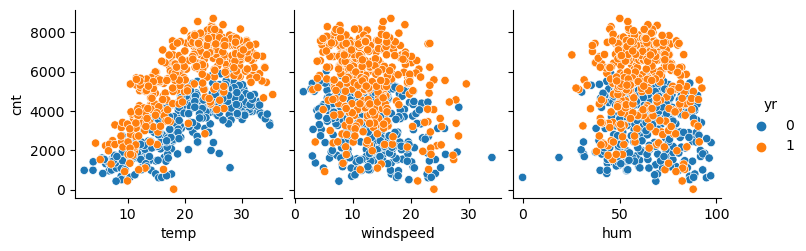

In [20]:
sns.pairplot(bike_df, x_vars=["temp", 'windspeed',"hum"],y_vars=['cnt'],hue ='yr')
plt.show()

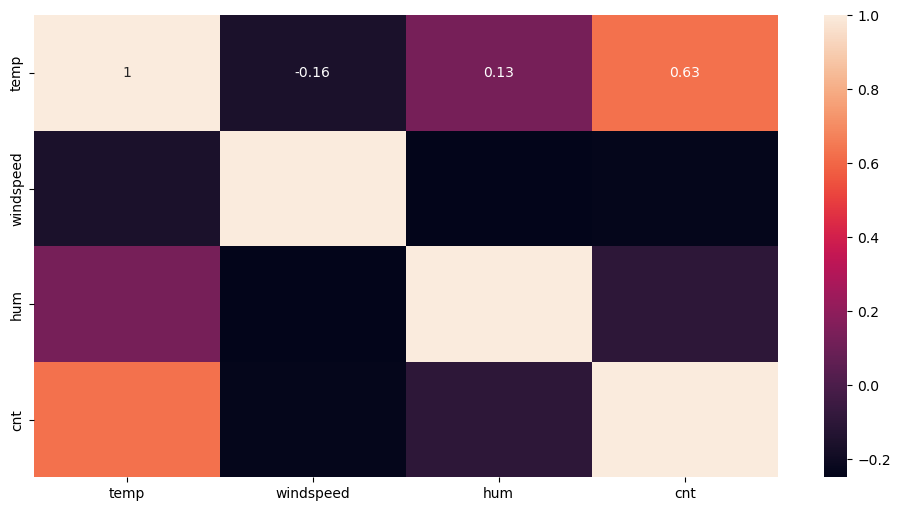

In [21]:
plt.figure(figsize = (12,6))
sns.heatmap(bike_df[["temp", 'windspeed',"hum",'cnt']].corr(), annot =True)
plt.show()

##### From Above two plot below are the observations:

WindSpeed has very Negetive impact on Target Variable.

Humidity has not much Negative effect on the Target Variable.



C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

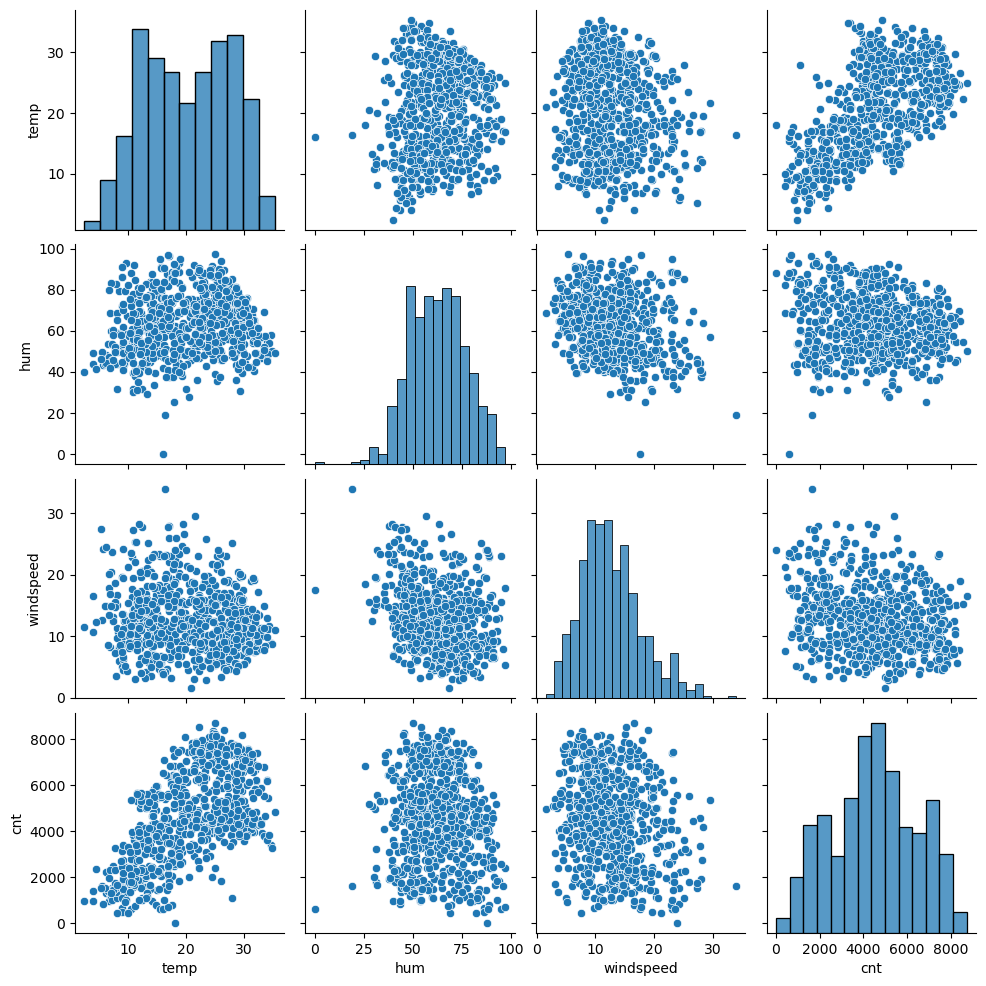

In [22]:
sns.pairplot(bike_df, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

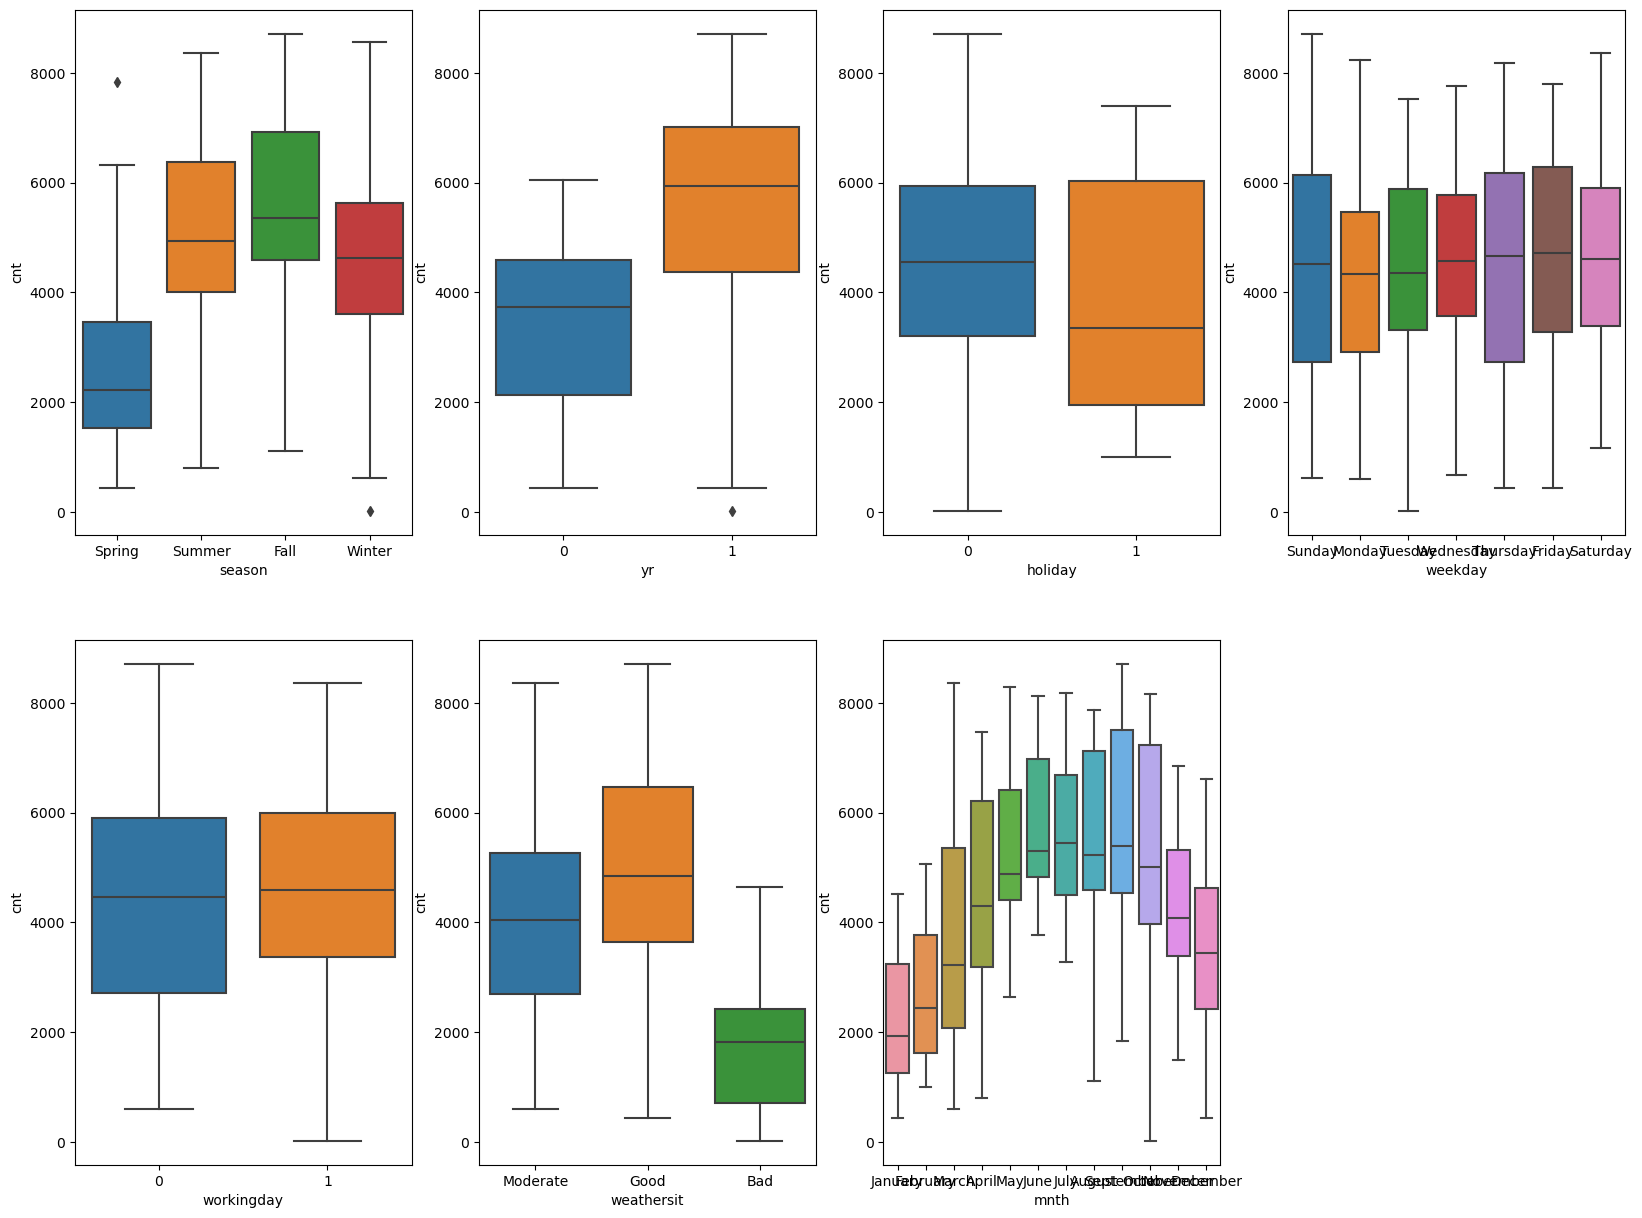

In [23]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.show()

##### Some of the observations from the plots above are as follows:
People are more likely to rent bikes in the summer and the fall season

Bike rental rates are the most in September and October

Saturday, Wednesday and Thursday are the days where more bikes are rented

Most bike rentals take place in the clear weather

More bikes were rented in 2019

There is no big discernable difference in bike rental rates depending on whether it's a working day or not

Bike rental rates are higher on holidays

#### Creating Dummy Variables
The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.
We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [24]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df[['season','mnth','weekday','weathersit']]

In [25]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [26]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Sunday,0,Moderate,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Monday,0,Moderate,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Tuesday,1,Good,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Wednesday,1,Good,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Thursday,1,Good,9.305237,43.6957,12.522300,1600


In [27]:
bike_df = pd.concat([dummy,bike_df],axis = 1)

In [28]:
bike_df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike_df.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weekday_Wednesday,weathersit_Good,weathersit_Moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,0,0,0,14.110847,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,0,0,0,14.902598,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,True,False,0,0,1,8.050924,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,True,True,False,0,0,1,8.200000,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,True,False,0,0,1,9.305237,43.6957,12.522300,1600


In [29]:
bike_df.shape

(730, 29)

In [30]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season_Spring        730 non-null    bool   
 1   season_Summer        730 non-null    bool   
 2   season_Winter        730 non-null    bool   
 3   mnth_August          730 non-null    bool   
 4   mnth_December        730 non-null    bool   
 5   mnth_February        730 non-null    bool   
 6   mnth_January         730 non-null    bool   
 7   mnth_July            730 non-null    bool   
 8   mnth_June            730 non-null    bool   
 9   mnth_March           730 non-null    bool   
 10  mnth_May             730 non-null    bool   
 11  mnth_November        730 non-null    bool   
 12  mnth_October         730 non-null    bool   
 13  mnth_September       730 non-null    bool   
 14  weekday_Monday       730 non-null    bool   
 15  weekday_Saturday     730 non-null    boo

In [31]:
bike_df = bike_df.replace({True: 1, False: 0})

# Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [33]:
print(train.shape)
print(test.shape)

(510, 29)
(220, 29)


# Step 5: Rescaling the Features
Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 


This time, we will use ****MinMax scaling****

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [36]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weekday_Wednesday,weathersit_Good,weathersit_Moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [37]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weekday_Wednesday,weathersit_Good,weathersit_Moderate,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.131373,0.625490,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.338139,0.484471,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


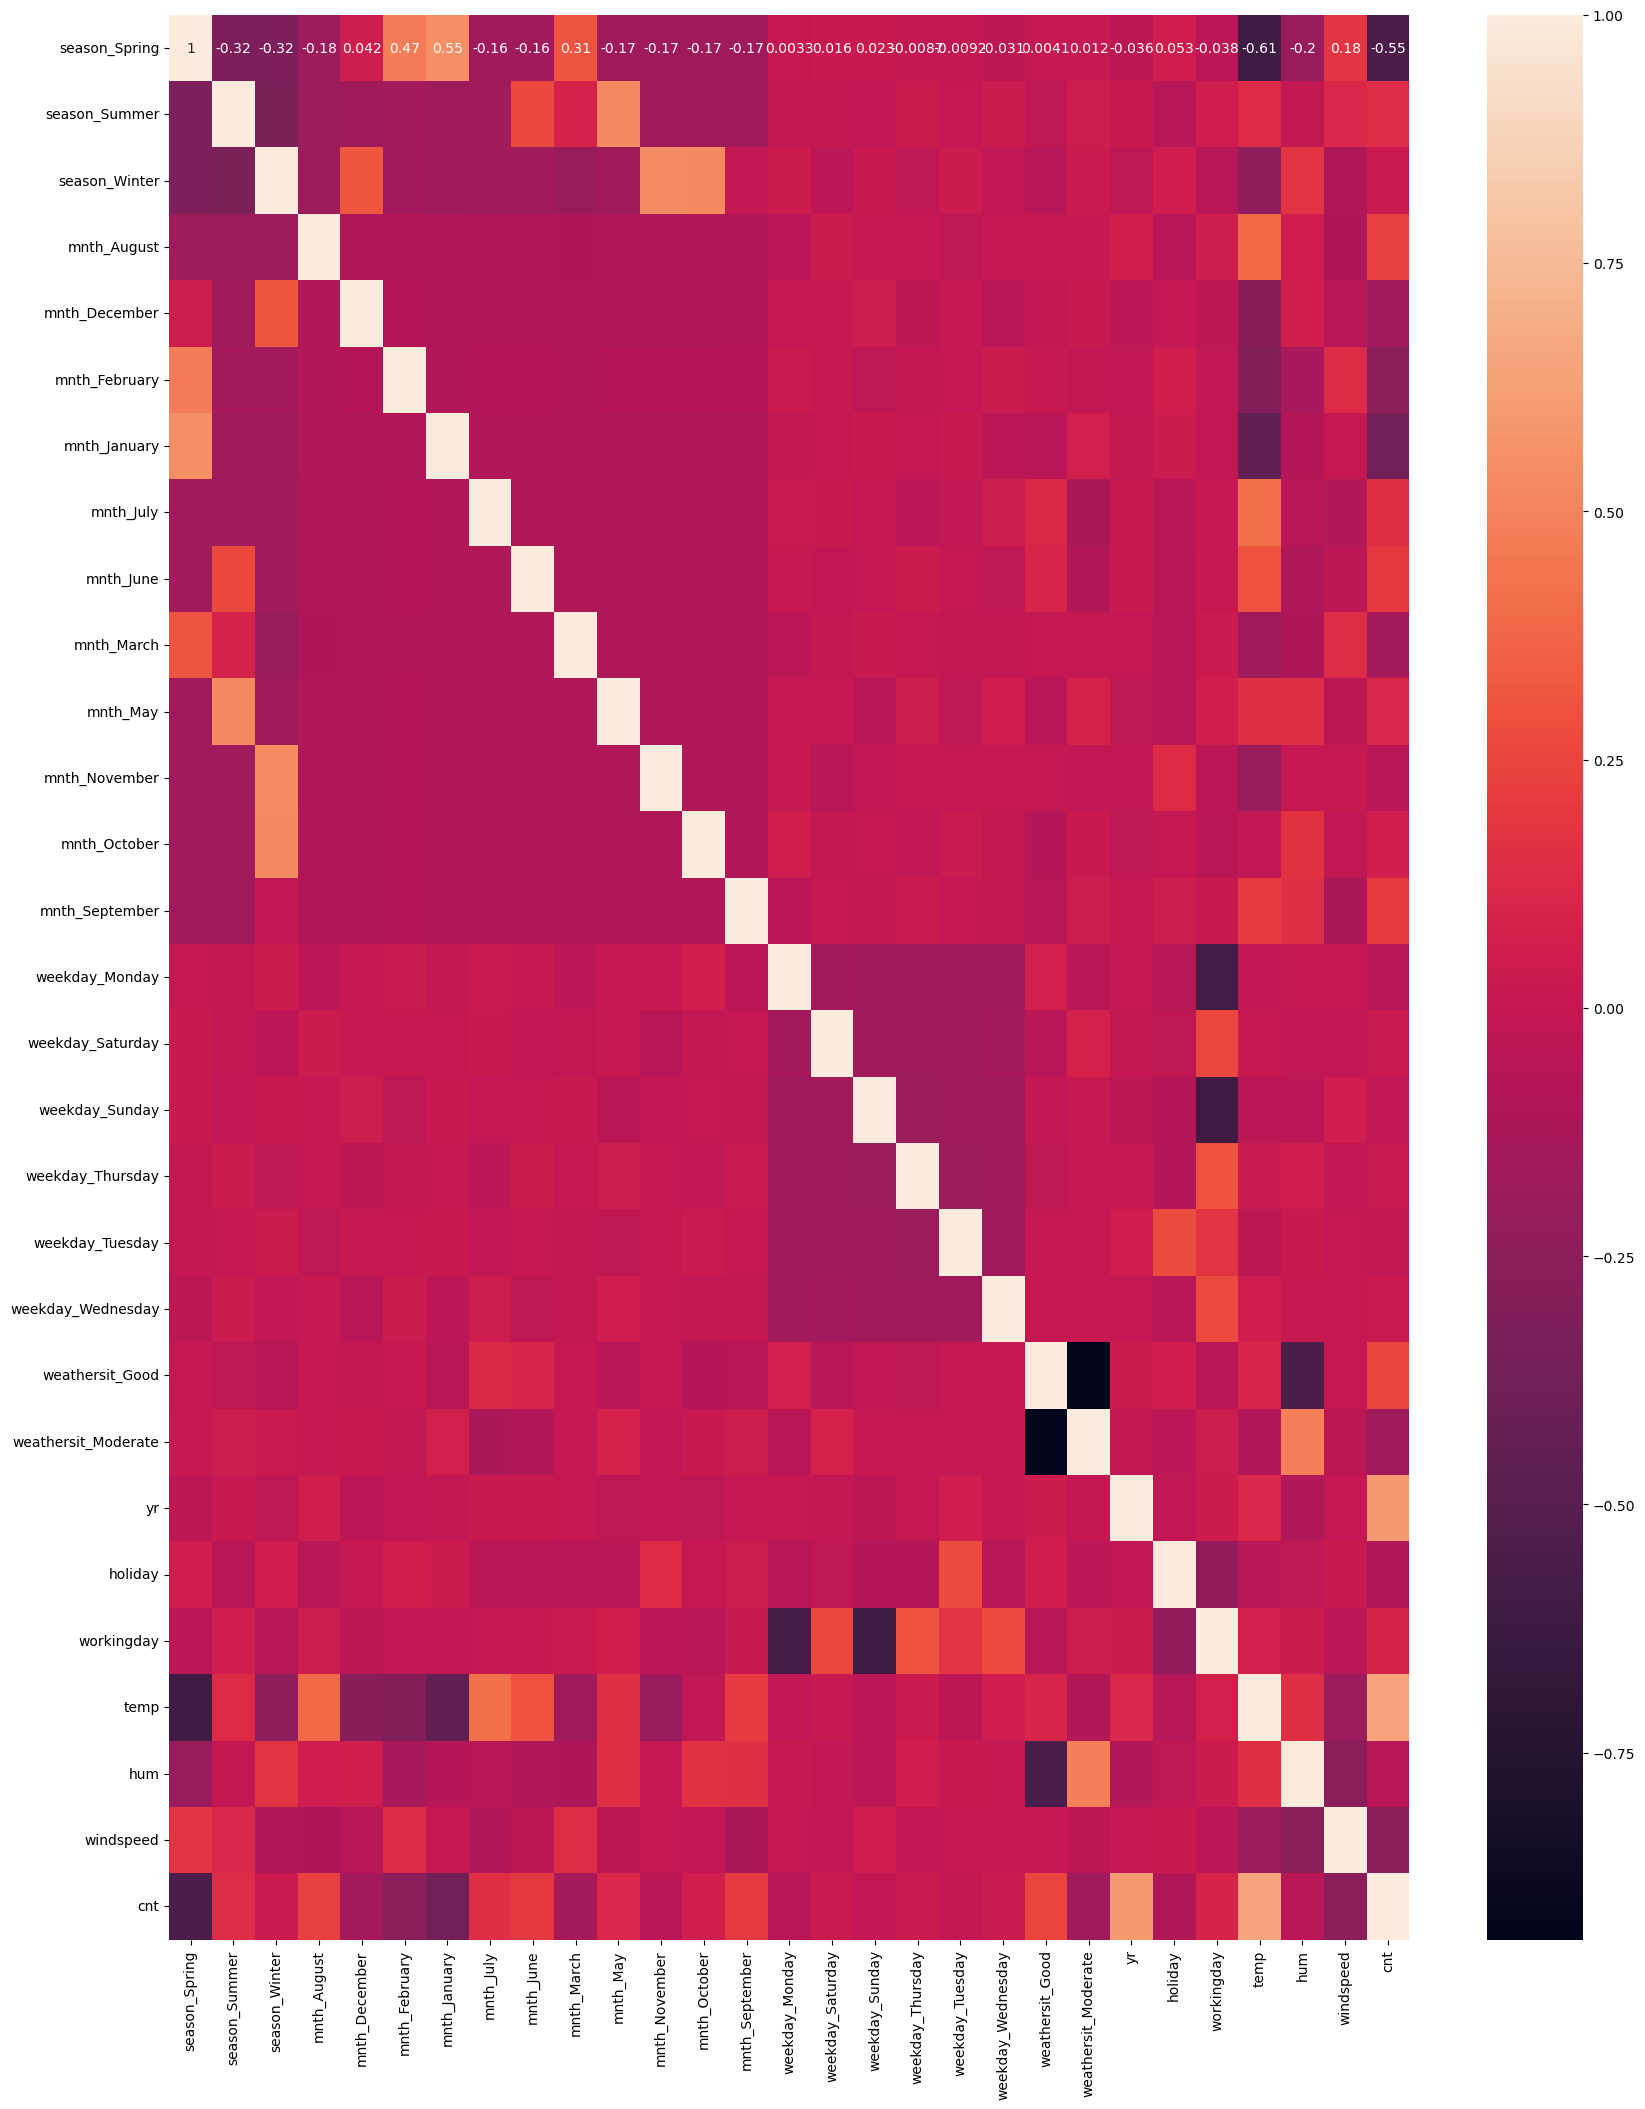

In [38]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True)
plt.show()

#### Dividing into X and Y sets for the model building

In [39]:
y_train = train.pop('cnt')
X_train = train

# Step 6: Building a linear model

We will use a mixed approach to build the model.
Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

Feature Selection
We start with 15 variables.
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [40]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 12),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_November', False, 2),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Good', True, 1),
 ('weathersit_Moderate', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Sunday', 'weathersit_Good',
       'weathersit_Moderate', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_December', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel for the detailed statistics

In [45]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Adding a constant variable
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [46]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [47]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Sunday,weathersit_Good,weathersit_Moderate,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,1,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


### Building the first linear models using statsmodels

In [48]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.22e-191
Time:                        22:39:49   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0044      0.048      0.092      0.927      -0.091       0.099
season_Spring          -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer           0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter           0.0933      0.017      5.403      0.000       0.059       0.127
mnth_January           -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_September          0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sunday          0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Good         0.2475      0.026      9.507      0.000       0.196       0.299
weathersit_Moderate     0.1911      0.025      7.755      0.000       0.143       0.240
yr                      0.2305      0.008     28.795      0.000       0.215       0.246
holiday                -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday              0.0433      0.012      3.762      0.000       0.021       0.066
temp                    0.5096      0.034     14.837      0.000       0.442       0.577
hum                    -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed              -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

Checking VIF for multicollinearity
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,25.63
12,temp,22.84
7,weathersit_Good,14.80
8,weathersit_Moderate,9.07
0,season_Spring,5.69
11,workingday,5.42
14,windspeed,4.69
2,season_Winter,4.12
1,season_Summer,3.21
9,yr,2.10


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 25.63

In [51]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

### Model 2

In [52]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.60e-188
Time:                        22:39:50   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1171      0.039     -2.980      0.003      -0.194      -0.040
season_Spring          -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer           0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter           0.0784      0.017      4.562      0.000       0.045       0.112
mnth_January           -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_September          0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Sunday          0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Good         0.2908      0.024     11.977      0.000       0.243       0.339
weathersit_Moderate     0.2095      0.025      8.499      0.000       0.161       0.258
yr                      0.2345      0.008     29.009      0.000       0.219       0.250
holiday                -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday              0.0464      0.012      3.966      0.000       0.023       0.069
temp                    0.4722      0.034     14.005      0.000       0.406       0.538
windspeed              -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
7,weathersit_Good,14.79
12,temp,13.96
8,weathersit_Moderate,8.48
11,workingday,5.34
13,windspeed,4.67
0,season_Spring,4.48
1,season_Summer,2.79
2,season_Winter,2.74
9,yr,2.08
6,weekday_Sunday,1.99


we want VIF to be less than 5. We will drop feature weathersit_Good which has highest VIF of 14.79

In [54]:
X_train_rfe = X_train_rfe.drop(['weathersit_Good'], axis=1)

### Model 3 

In [55]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.07e-162
Time:                        22:39:50   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1652      0.036      4.630      0.000       0.095       0.235
season_Spring          -0.0535      0.024     -2.259      0.024      -0.100      -0.007
season_Summer           0.0477      0.017      2.806      0.005       0.014       0.081
season_Winter           0.0686      0.019      3.523      0.000       0.030       0.107
mnth_January           -0.0342      0.020     -1.712      0.087      -0.073       0.005
mnth_July              -0.0511      0.021     -2.462      0.014      -0.092      -0.010
mnth_September          0.0660      0.019      3.491      0.001       0.029       0.103
weekday_Sunday          0.0510      0.017      3.064      0.002       0.018       0.084
weathersit_Moderate    -0.0675      0.010     -6.972      0.000      -0.087      -0.048
yr                      0.2399      0.009     26.205      0.000       0.222       0.258
holiday                -0.0481      0.031     -1.553      0.121      -0.109       0.013
workingday              0.0392      0.013      2.962      0.003       0.013       0.065
temp                    0.4872      0.038     12.744      0.000       0.412       0.562
windspeed              -0.1851      0.028     -6.596      0.000      -0.240      -0.130
==============================================================================
Omnibus:                      143.520   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.568
Skew:                          -1.251   Prob(JB):                    1.67e-115
Kurtosis:                       7.315   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,7.06
10,workingday,5.22
12,windspeed,4.62
0,season_Spring,3.07
1,season_Summer,2.34
8,yr,2.07
2,season_Winter,1.96
6,weekday_Sunday,1.96
3,mnth_January,1.62
4,mnth_July,1.59


Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_3 as the final model to proceed with the future prdeictions.

# Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_pred = lm_3.predict(X_train_lm)

C:\Users\vishw\AppData\Local\Temp\ipykernel_4728\2590827416.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)
C:\Users\vishw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


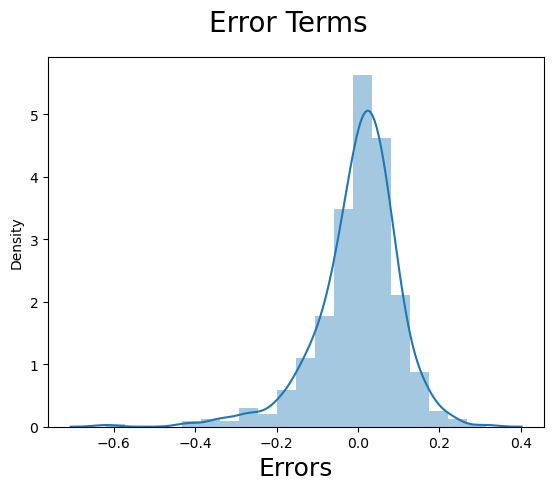

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

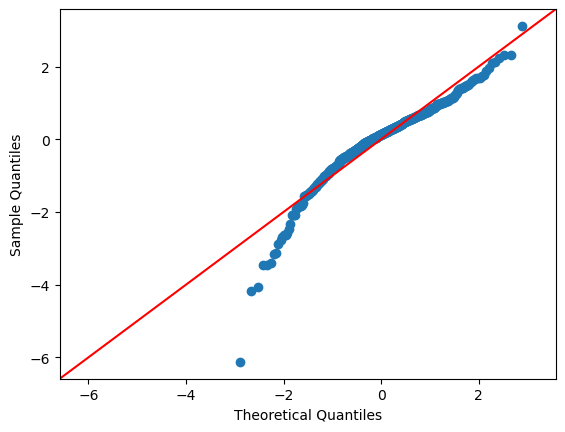

In [59]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()


Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

# Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

### Applying the scaling on the test sets

In [60]:
num_vars = ['cnt','hum','windspeed','temp']

test[num_vars] = scaler.transform(test[num_vars])

### Dividing into X_test and y_test

In [61]:
y_test = test.pop('cnt')
X_test = test

In [62]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_3.predict(X_test)

### Calculating the r-squared
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [63]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.7972742574190066
r2_score of test dataset 0.7768555285450173


# Step 9: Model Evaluation
Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

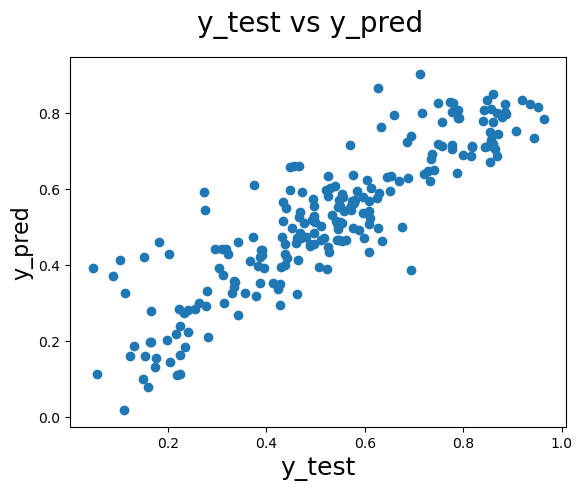

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [65]:
param = pd.DataFrame(lm_3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
12,temp,0.487171
9,yr,0.239914
0,const,0.165227
3,season_Winter,0.068579
6,mnth_September,0.065961
7,weekday_Sunday,0.051029
2,season_Summer,0.047744
11,workingday,0.039219
4,mnth_January,-0.034183


# Conclusions :
For our model, the best fit line is determined by the following equation:

cnt = 0.165227 + 0.487171 x{temp} + 0.239914 x{yr} + 0.068579 x{season_Winter} + 0.065961 x{mnth_September} + 0.051029 x{weekday_Sunday} + 0.047744 x{season_Summer} + 0.039219 x{workingday} - 0.034183 x{mnth_January} - 0.048140 x{holiday} - 0.051145 x{mnth_July} - 0.053503 x{season_Spring} - 0.067509 x{weathersit_Moderate} - 0.185137 x{windspeed} 

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

# Recommendations :
The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.

With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.

During the Winter season the demand rises, hence it should be well prepared to meet the high demand.

Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.